# P3

In [309]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Mínimos cuadrados

La ecuación de la línea es:

$ y(x) = a_1 x + a_0 $

Al aplicar el método de interpolación por mínimos cuadrados queda el siguiente sistema de ecuaciones:


$( \sum_i (y_i - a_1 x_i - a_0) , \sum_i (y_i - a_1 x_i - a_0)x_i ) = 0$


En caso de la ecuación de segundo grado:
$  f(x) = a x^2+ b x+c $

se obtiene 
$ ( \sum (y_i - a x_i^2 - b x_i -c ) ( x_i^2) ,  \sum (y_i - a x_i^2 - b x_i  -c) ( x_i), \sum (y_i - a x_i^2 - b x_i  -c )  ) = 0 $


In [310]:
# Derivadas parciales
# ####################################################################
def der_parcial_1(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 1 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """

    # coeficiente del término independiente
    c_ind = sum(ys)

    # coeficiente del parámetro 1
    c_1 = sum(xs)

    # coeficiente del parámetro 0
    c_0 = len(xs)

    return (c_1, c_0, c_ind)


def der_parcial_0(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 0 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """
    c_1 = 0
    c_0 = 0
    c_ind = 0
    for xi, yi in zip(xs, ys):
        # coeficiente del término independiente
        c_ind += xi * yi

        # coeficiente del parámetro 1
        c_1 += xi * xi

        # coeficiente del parámetro 0
        c_0 += xi

    return (c_1, c_0, c_ind)

## Conjunto de datos 1

In [311]:
xs = [
    1.1715,
    1.3396,
    1.4163,
    1.9962,
    2.2523,
    2.2947,
    2.5793,
    2.7054,
    2.7635,
    2.8200,
    3.0317,
    3.5111,
    3.5393,
    3.9829,
    4.0323,
    4.1353,
    4.2084,
    4.4683,
    4.6509,
    4.7489,
]


ys = [
    1.1902,
    0.9564,
    0.6078,
    -0.0856,
    -0.3550,
    0.1355,
    -0.3171,
    -0.3425,
    -0.3758,
    -0.1518,
    -0.2767,
    0.6251,
    0.6447,
    2.2733,
    2.1789,
    2.6781,
    2.3818,
    3.3786,
    4.4971,
    5.1431,
]

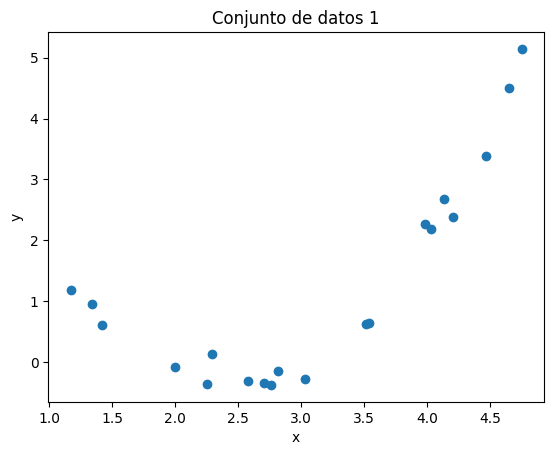

In [312]:
import matplotlib.pyplot as plt

plt.scatter(xs, ys)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Conjunto de datos 1")
plt.show()

In [313]:
%autoreload 2
from src import ajustar_min_cuadrados
pars = ajustar_min_cuadrados(xs, ys, gradiente=[der_parcial_0, der_parcial_1])
pars # parámetros de la curva ajustada

[08-13 14:25:04][INFO] Se ajustarán 2 parámetros.
[08-13 14:25:04][INFO] 
[[61.6479     20.         24.7861    ]
 [ 0.         -7.83899109 16.56283549]]


array([ 1.0875256 , -2.11287847])

In [314]:
# ####################################################################
def linea(x: float, pars: tuple[float]) -> float:
    """Ecuación de la recta y = a1 * x + a0.

    ## Parameters

    ``x``: valor de x.

    ``pars``: parámetros de la recta. Deben ser de la forma (a1, a0).

    ## Return

    ``y``: valor de y.

    """
    a1, a0 = pars
    return a1 * x + a0

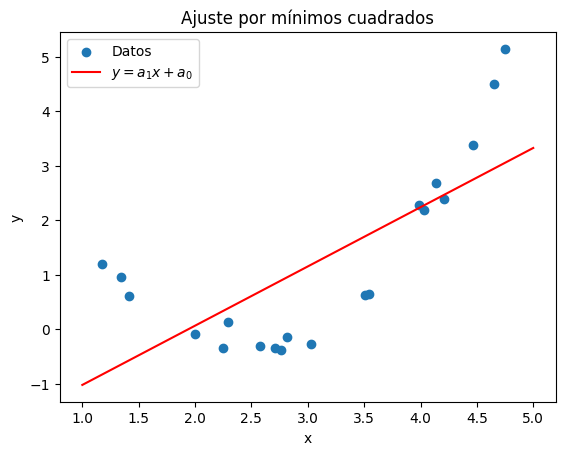

In [315]:
import numpy as np

x = np.linspace(1, 5, 100)
y_l = [linea(xi, pars) for xi in x]

plt.scatter(xs, ys, label="Datos")
plt.plot(x, y_l, color="red", label=r"$ y = a_1 x + a_0 $")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste por mínimos cuadrados")
plt.legend()
plt.show()

In [316]:
# ####################################################################
def der_parcial_0_parabol(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 0 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_2 * a_2 + c_1 * a_1 + c_0 * a_0 = c_ind    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_2``: coeficiente del parámetro 2.

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """
    c_2 = 0
    c_1 = 0
    c_0 = 0
    c_ind = 0
    for xi, yi in zip(xs, ys):
        # coeficiente del término independiente
        c_ind += yi

        # coeficiente del parámetro 2
        c_2 += xi * xi

        # coeficiente del parámetro 1
        c_1 += xi

        # coeficiente del parámetro 0
        c_0 += 1

    return (c_2, c_1, c_0, c_ind)


# ####################################################################
def der_parcial_1_parabol(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 1 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_2 * a_2 + c_1 * a_1 + c_0 * a_0 = c_ind    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_2``: coeficiente del parámetro 2.

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """
    c_2 = 0
    c_1 = 0
    c_0 = 0
    c_ind = 0
    for xi, yi in zip(xs, ys):
        # coeficiente del término independiente
        c_ind += yi * xi

        # coeficiente del parámetro 2
        c_2 += xi * xi * xi

        # coeficiente del parámetro 1
        c_1 += xi * xi

        # coeficiente del parámetro 0
        c_0 += xi

    return (c_2, c_1, c_0, c_ind)


# ####################################################################
def der_parcial_2_parabol(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 2 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:    c_2 * a_2 + c_1 * a_1 + c_0 * a_0 = c_ind

    ## Parameters
    ``xs``: lista de valores de x.
    ``ys``: lista de valores de y.
    ## Return
    ``c_2``: coeficiente del parámetro 2.
    ``c_1``: coeficiente del parámetro 1.
    ``c_0``: coeficiente del parámetro 0.
    ``c_ind``: coeficiente del término independiente.
    """

    c_2 = 0
    c_1 = 0
    c_0 = 0
    c_ind = 0
    for xi, yi in zip(xs, ys):
        # coeficiente del término independiente
        c_ind += yi * xi**2

        # coeficiente del parámetro 2
        c_2 += xi**4

        # coeficiente del parámetro 1
        c_1 += xi**3

        # coeficiente del parámetro 0
        c_0 += xi**2

    return (c_2, c_1, c_0, c_ind)

In [317]:
def cuadratica(x: float, pars: tuple[float]) -> float:
    a2, a1, a0 = pars
    return a2 * x**2 + a1 * x + a0

In [318]:
pars_cuad = ajustar_min_cuadrados(
    xs,
    ys,
    gradiente=[der_parcial_0_parabol, der_parcial_1_parabol, der_parcial_2_parabol],
)
print(pars_cuad)

[08-13 14:25:04][INFO] Se ajustarán 3 parámetros.
[08-13 14:25:04][INFO] 
[[ 214.18604567   61.6479       20.           24.7861    ]
 [   0.          -17.57011186  -13.53914045    9.4986119 ]
 [   0.         -112.51779515  -83.54300563   78.89917291]]
[08-13 14:25:04][INFO] 
[[214.18604567  61.6479      20.          24.7861    ]
 [  0.         -17.57011186 -13.53914045   9.4986119 ]
 [  0.           0.           3.16072415  18.07071169]]
[ 1.00550151 -4.94621361  5.71726948]


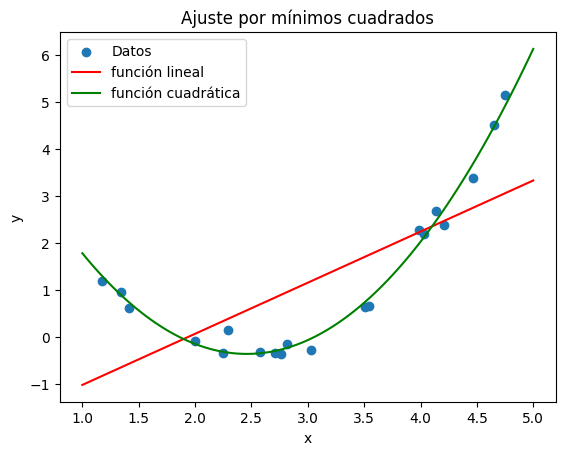

In [319]:
import numpy as np

x = np.linspace(1, 5, 100)

y_cuad = [cuadratica(xi, pars_cuad) for xi in x]

plt.scatter(xs, ys, label="Datos")
plt.plot(x, y_l, color="red", label=r"función lineal")
plt.plot(x, y_cuad, color="green", label=r"función cuadrática")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste por mínimos cuadrados")
plt.legend()
plt.show()

In [320]:
calc_error_rel = lambda x, x_approx: abs(x - x_approx) / abs(x)

y_cuad = [cuadratica(xi, pars_cuad) for xi in xs]

errors = [calc_error_rel(yi, y_hat_i) for yi, y_hat_i in zip(ys, y_cuad)]
print(*errors, sep="\n")
sum(errors) / len(errors)

0.09455791413704316
0.06344363574829776
0.19922400230545692
0.7479577916583121
0.09204570480094397
3.4958655375741623
0.10725451604758791
0.1101866762403788
0.27449463175376543
0.5474485337312173
0.8684643245271444
0.19383095535156855
0.251272845644854
0.13440334876797258
0.02632194112230323
0.0821932952313133
0.1376647478711174
0.09265660992212377
0.007627612610409138
0.04642779407022218


np.float64(0.3786671209558097)

In [322]:
y_linea

[np.float64(-0.8388422293182376),
 np.float64(-0.6560291761424244),
 np.float64(-0.5726159627064642),
 np.float64(0.05804013209814096),
 np.float64(0.33655543797753307),
 np.float64(0.38266652337107576),
 np.float64(0.6921763088192403),
 np.float64(0.8293132868410731),
 np.float64(0.8924985241374133),
 np.float64(0.9539437204755061),
 np.float64(1.184172889763547),
 np.float64(1.7055326618782698),
 np.float64(1.736200883767371),
 np.float64(2.2186272394413202),
 np.float64(2.272351004027193),
 np.float64(2.3843661407143357),
 np.float64(2.463864261994241),
 np.float64(2.746512165149469),
 np.float64(2.9450943395093945),
 np.float64(3.0516718482020164)]

In [321]:
y_linea = [linea(xi, pars) for xi in xs]

errors = [calc_error_rel(yi, y_hat_i) for yi, y_hat_i in zip(ys, y_linea)]
print(*errors, sep="\n")
sum(errors) / len(errors)

1.7047909841356392
1.6859359850924553
1.9421124756605204
1.6780389263801516
1.9480434872606567
1.8241071835503744
3.18283288810861
3.4213526623097024
3.374929547997374
7.284214232381463
5.279627357295074
1.7284157124912332
1.6930368912166447
0.024049954057396582
0.042889074316027696
0.10967994447020814
0.03445472415578171
0.18708572629211248
0.3451125526429489
0.40664738227877806


np.float64(1.8948678846046576)

# Indicaciones
Su trabajo es ajustar el código para utilizar una función lineal y una cuadrática que aproxime los puntos. Tenga en cuenta las siguientes consideraciones:
* Usar el método de mínimos cuadrados para interpolar los puntos.
* Graficar la función cuadrática y los puntos dados.
* Modificar y utilizar SOLO el código provisto. No se aceptarán la utilización de otras librerías o funciones.